# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [13]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [14]:
train, test = keras.datasets.cifar10.load_data()

In [15]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [16]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [24]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [25]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr) # RMSprop
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0716 22:25:52.763810  6172 deprecation.py:323] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 242us/step - loss: 14.4438 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 141us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 129us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 129us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 142us/step - loss: 14.5063 - acc: 0.1000 - val_l

50000/50000 [==============================] - 7s 144us/step - loss: 14.4417 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 138us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 140us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 139us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 139us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 138us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 140us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 7s 141us/step - loss: 2.4210 - acc: 0.2069 - val_loss: 1.9686 - val_acc: 0.3022
Epoch 2/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.9015 - acc: 0.3122 - val_loss: 1.8402 - val_acc: 0.3209
Epoch 3/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.7995 - acc: 0.3544 - val_loss: 1.7116 - val_acc: 0.3862
Epoch 4/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.7197 - acc: 0.3828 - val_loss: 1.8946 - val_acc: 0.3413
Epoch 5/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6542 - acc: 0.4076 - val_loss: 1.6770 - val_acc: 0.4005
Epoch 6/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6094 - acc: 0.4250 - val_loss: 1.6169 - val_acc: 0.4195
Epoch 7/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.5683 - acc: 0.4404 - val_loss: 1.7202 - val_acc: 0.3942
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 139us/step - loss: 1.7912 - acc: 0.3633 - val_loss: 1.8031 - val_acc: 0.3569
Epoch 3/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.7116 - acc: 0.3930 - val_loss: 1.6638 - val_acc: 0.4158
Epoch 4/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6570 - acc: 0.4136 - val_loss: 1.6907 - val_acc: 0.3845
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.6146 - acc: 0.4295 - val_loss: 1.6077 - val_acc: 0.4202
Epoch 6/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5799 - acc: 0.4415 - val_loss: 1.6253 - val_acc: 0.4215
Epoch 7/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.5477 - acc: 0.4551 - val_loss: 1.5788 - val_acc: 0.4397
Epoch 8/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.5175 - acc: 0.4634 - val_loss: 1.5530 - val_acc: 0.4528
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 120us/step - loss: 1.8714 - acc: 0.3510 - val_loss: 1.8561 - val_acc: 0.3535
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8273 - acc: 0.3637 - val_loss: 1.8245 - val_acc: 0.3651
Epoch 5/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.7939 - acc: 0.3772 - val_loss: 1.7882 - val_acc: 0.38331.
Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.7671 - acc: 0.3855 - val_loss: 1.7642 - val_acc: 0.3865
Epoch 7/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.7441 - acc: 0.3944 - val_loss: 1.7426 - val_acc: 0.3978
Epoch 8/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.7235 - acc: 0.4020 - val_loss: 1.7272 - val_acc: 0.4033
Epoch 9/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7060 - acc: 0.4066 - val_loss: 1.7065 - val_acc: 0.4057
Epoch 10/50
50000/50000 [================

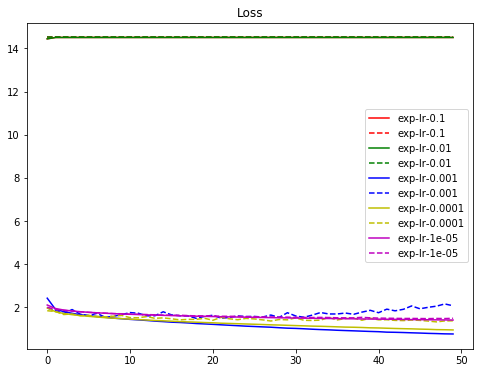

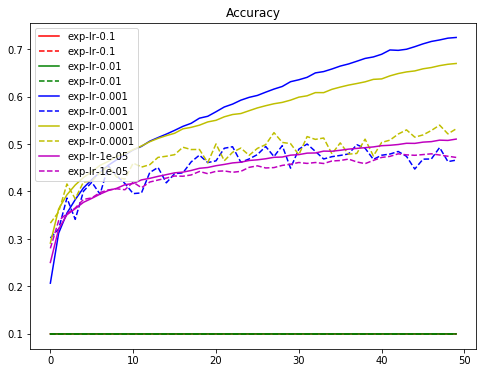

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [28]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr) # Adagrad
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 207us/step - loss: 14.4446 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 10s 201us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 177us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 172us/step - loss: 14.5063 - acc: 0.1000 - val_

50000/50000 [==============================] - 7s 148us/step - loss: 2.0158 - acc: 0.2808 - val_loss: 1.9174 - val_acc: 0.2906
Epoch 2/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.8190 - acc: 0.3568 - val_loss: 1.8062 - val_acc: 0.3520
Epoch 3/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.7463 - acc: 0.3882 - val_loss: 1.7284 - val_acc: 0.3832
Epoch 4/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6944 - acc: 0.4062 - val_loss: 1.6762 - val_acc: 0.4173
Epoch 5/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.6558 - acc: 0.4201 - val_loss: 1.6445 - val_acc: 0.4196
Epoch 6/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6249 - acc: 0.4309 - val_loss: 1.6986 - val_acc: 0.4011
Epoch 7/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5998 - acc: 0.4407 - val_loss: 1.6068 - val_acc: 0.4333
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 121us/step - loss: 1.9316 - acc: 0.3296 - val_loss: 1.9094 - val_acc: 0.3381
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.8889 - acc: 0.3450 - val_loss: 1.8780 - val_acc: 0.3506
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8611 - acc: 0.3563 - val_loss: 1.8547 - val_acc: 0.3585
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.8412 - acc: 0.3640 - val_loss: 1.8408 - val_acc: 0.3566
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.8259 - acc: 0.3680 - val_loss: 1.8237 - val_acc: 0.3684
Epoch 7/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.8124 - acc: 0.3736 - val_loss: 1.8104 - val_acc: 0.3702
Epoch 8/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8006 - acc: 0.3776 - val_loss: 1.8002 - val_acc: 0.3774
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 130us/step - loss: 2.2111 - acc: 0.2023 - val_loss: 2.2014 - val_acc: 0.2129
Epoch 4/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.1939 - acc: 0.2191 - val_loss: 2.1865 - val_acc: 0.2216
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1804 - acc: 0.2278 - val_loss: 2.1743 - val_acc: 0.2346
Epoch 6/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.1689 - acc: 0.2363 - val_loss: 2.1637 - val_acc: 0.2389
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.1588 - acc: 0.2435 - val_loss: 2.1544 - val_acc: 0.2451
Epoch 8/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.1499 - acc: 0.2488 - val_loss: 2.1462 - val_acc: 0.2525
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.1419 - acc: 0.2542 - val_loss: 2.1388 - val_acc: 0.2569
Epoch 10/50
50000/50000 [====================

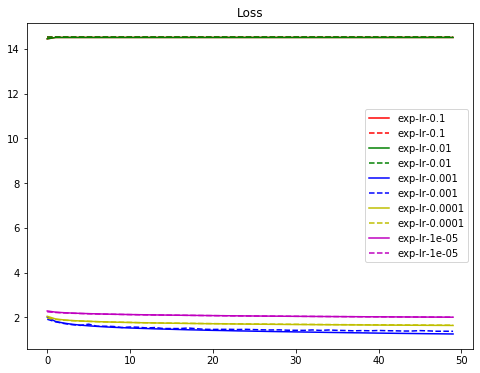

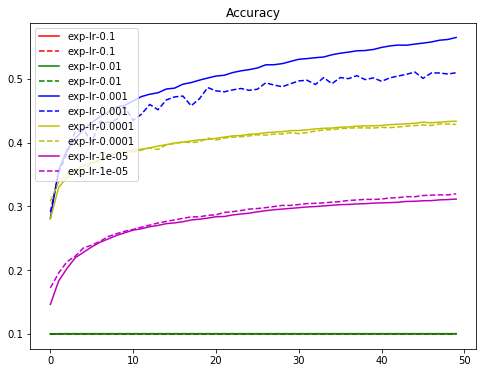

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [31]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr) # Adam
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 217us/step - loss: 14.4277 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 9s 187us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 187us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 189us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 187us/step - loss: 14.5063 - acc: 0.1000 - val_l

50000/50000 [==============================] - 8s 158us/step - loss: 1.9343 - acc: 0.3068 - val_loss: 1.8411 - val_acc: 0.3346
Epoch 2/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7168 - acc: 0.3877 - val_loss: 1.6625 - val_acc: 0.4177
Epoch 3/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6190 - acc: 0.4227 - val_loss: 1.6101 - val_acc: 0.4340
Epoch 4/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5622 - acc: 0.4446 - val_loss: 1.5214 - val_acc: 0.4607
Epoch 5/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5068 - acc: 0.4637 - val_loss: 1.4934 - val_acc: 0.4696
Epoch 6/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.4681 - acc: 0.4765 - val_loss: 1.5194 - val_acc: 0.4614
Epoch 7/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.4504 - acc: 0.4839 - val_loss: 1.4524 - val_acc: 0.4856
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 8s 152us/step - loss: 1.7123 - acc: 0.3968 - val_loss: 1.6550 - val_acc: 0.4176
Epoch 3/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.6321 - acc: 0.4262 - val_loss: 1.6025 - val_acc: 0.4388
Epoch 4/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.5792 - acc: 0.4434 - val_loss: 1.5725 - val_acc: 0.4490
Epoch 5/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5323 - acc: 0.4610 - val_loss: 1.5469 - val_acc: 0.4530
Epoch 6/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.4980 - acc: 0.4736 - val_loss: 1.4978 - val_acc: 0.4649
Epoch 7/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.4678 - acc: 0.4848 - val_loss: 1.4832 - val_acc: 0.4737
Epoch 8/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.4309 - acc: 0.4951 - val_loss: 1.4583 - val_acc: 0.4854
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 8s 166us/step - loss: 1.8569 - acc: 0.3536 - val_loss: 1.8317 - val_acc: 0.3588
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.8096 - acc: 0.3690 - val_loss: 1.7958 - val_acc: 0.3775
Epoch 5/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.7765 - acc: 0.3829 - val_loss: 1.7669 - val_acc: 0.3807
Epoch 6/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.7486 - acc: 0.3913 - val_loss: 1.7414 - val_acc: 0.3963
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.7246 - acc: 0.4013 - val_loss: 1.7203 - val_acc: 0.4005
Epoch 8/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.7020 - acc: 0.4082 - val_loss: 1.7007 - val_acc: 0.4083
Epoch 9/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.6837 - acc: 0.4146 - val_loss: 1.6809 - val_acc: 0.4126
Epoch 10/50
50000/50000 [====================

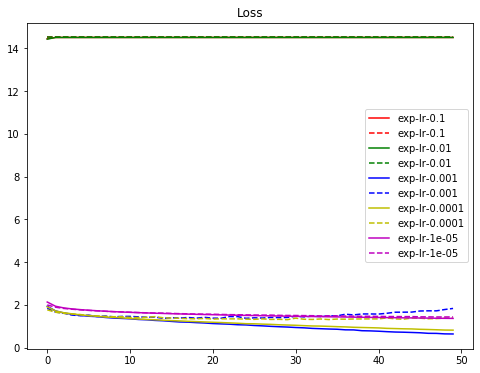

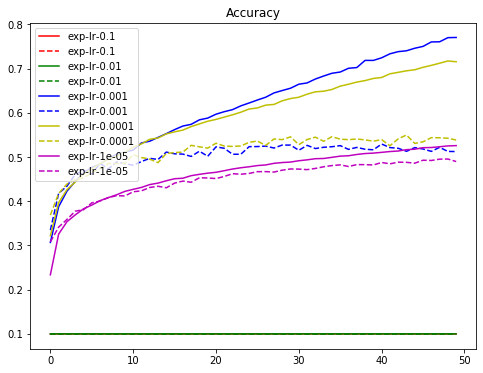

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()